In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

In [2]:
ratings_data=pd.read_csv("ratings_Video_Games.csv",names=['userId', 'productId','Rating','timestamp'])
ratings_data.drop(['timestamp'], axis=1,inplace=True)

In [3]:
ratings_data.head(15)

,userId,productId,Rating
0,0439381673,A21ROB4YDOZA5P,1.0
1,0439381673,A3TNZ2Q5E7HTHD,3.0
2,0439381673,A1OKRM3QFEATQO,4.0
3,0439381673,A2XO1JFCNEYV3T,1.0
4,0439381673,A19WLPIRHD15TH,4.0
5,0439381673,A1TLA7XXSZMTS7,5.0
6,0439381673,A3I9GK5OO42B0I,3.0
7,0439381673,A3TPP95Y9DH3L9,5.0
8,0439381673,A19GOZTT15KPG1,5.0
9,0439381673,A1441WFJ5KRP7J,5.0


In [4]:
ratings_data.shape

(2565349, 3)

In [5]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565349 entries, 0 to 2565348
Data columns (total 3 columns):
userId       object
productId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 58.7+ MB


In [6]:
ratings_data.describe()['Rating'].T

count    2.565349e+06
mean     4.022095e+00
std      1.405936e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21a1c0d7780>,
 'caps': [<matplotlib.lines.Line2D at 0x21a1c0d7e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a1c0d7358>],
 'medians': [<matplotlib.lines.Line2D at 0x21a1c0f14e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a1c0f1828>],
 'means': []}

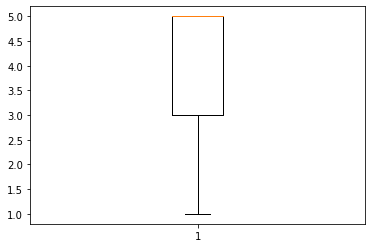

In [7]:
plt.boxplot(ratings_data['Rating'])

In [8]:
ratings_data.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

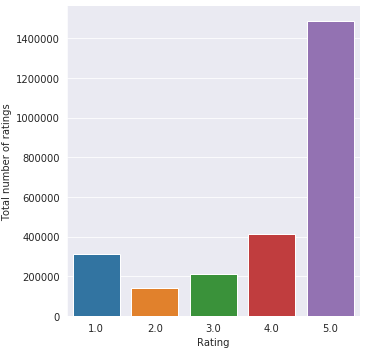

In [9]:
with sns.axes_style('darkgrid'):
    rating_plot = sns.catplot("Rating", data=ratings_data, kind='count')
    rating_plot.set_ylabels("Total number of ratings")

In [10]:
print("Total no of ratings :",ratings_data.shape[0])
print("Total No of unique users   :", len(np.unique(ratings_data.userId)))
print("Total No of unique products  :", len(np.unique(ratings_data.productId)))

Total no of ratings : 2565349
Total No of unique users   : 71982
Total No of unique products  : 1540618


In [11]:
user_diversity_scan= ratings_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

user_diversity_scan.head(10)

userId
B00178630A    7630
B00HTK1NCS    6462
B004RMK57U    5135
B00KKAQYXM    4359
B00JJNQG98    3962
B003ZSP0WW    3960
B000ZKA0J6    3930
B000VJRU44    3634
B00E4MQODC    3520
B000B9RI14    3345
Name: Rating, dtype: int64

In [12]:
user_diversity_scan.tail(10)

userId
B00IUCD0WK    1
B00IW20SUK    1
B000J3OSG0    1
B00IV5I95E    1
B000J45TKS    1
B000J4DLWG    1
B000J4I8JC    1
B000J4MIBQ    1
B000J4QVE6    1
0042000742    1
Name: Rating, dtype: int64

In [13]:
user_diversity_scan.describe()

count    71982.000000
mean        35.638757
std        140.211198
min          1.000000
25%          2.000000
50%          5.000000
75%         19.000000
max       7630.000000
Name: Rating, dtype: float64

In [14]:
print(' No of users who rated more than 100 items : {}'.format(sum(user_diversity_scan >= 100)))

 No of users who rated more than 100 items : 5223


In [15]:
product_popularity_scan= ratings_data.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

product_popularity_scan.head(10)

productId
AJKWF4W7QD4NS     888
A3V6Z4RCDGRC44    873
A3W4D8XOGLWUN5    746
A2TCG2HV1VJP6V    641
A2QHS1ZCIQOL7E    512
A119Q9NFGVOEJZ    472
A29BQ6B90Y1R5F    422
A2582KMXLK2P06    365
A74TA8X5YQ7NE     319
A20DZX38KRBIT8    309
Name: Rating, dtype: int64

In [16]:
product_popularity_scan.describe()

count    1.540618e+06
mean     1.665143e+00
std      2.892944e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      8.880000e+02
Name: Rating, dtype: float64

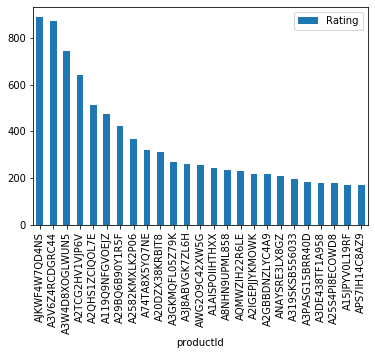

In [17]:
maximum_rated_products = pd.DataFrame(ratings_data.groupby('productId')['Rating'].count())
popularity_based_recommendations = maximum_rated_products.sort_values('Rating', ascending=False)
popularity_based_recommendations.head(25).plot(kind = "bar")

In [18]:
product_database=ratings_data.groupby("productId").filter(lambda x:x['Rating'].count() >=75)

In [19]:
ratings_per_product = product_database.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

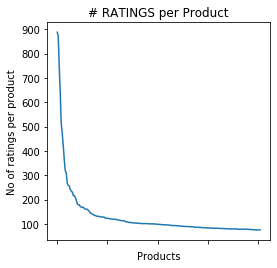

In [20]:

figure = plt.figure(figsize=plt.figaspect(1))
ax = plt.gca()
plt.plot(ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Products')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [21]:
product_database.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
A272AZYCH9WGDY    5.0
A119Q9NFGVOEJZ    5.0
A3KMEUY129LFLH    5.0
A388O5MXR7HT6O    5.0
A309NJSNDC60I2    5.0
Name: Rating, dtype: float64

In [22]:
mean_ratings = pd.DataFrame(product_database.groupby('productId')['Rating'].mean())
mean_ratings['rating_counts'] = pd.DataFrame(product_database.groupby('productId')['Rating'].count())
mean_ratings.head()

,Rating,rating_counts
productId,,
A103KKI1Y4TFNQ,4.473684,76
A114TMHW9GRMPB,3.909677,155
A119Q9NFGVOEJZ,5.000000,472
A11LS12ZU93SV6,3.081395,86
A11V6ZJ2FVQY1D,4.337500,160


<Figure size 720x540 with 0 Axes>

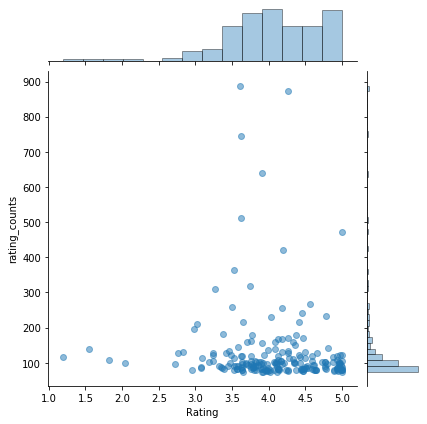

In [23]:
plt.figure(figsize=(10,7.5))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=mean_ratings, alpha=0.5)

In [24]:
collaborative_recommending_matrix = product_database.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
collaborative_recommending_matrix.head()

productId,A103KKI1Y4TFNQ,A114TMHW9GRMPB,A119Q9NFGVOEJZ,A11LS12ZU93SV6,A11V6ZJ2FVQY1D,A128WX1VPYJTUU,A12E0Y0J6584RT,A12GIOKE26ZFKJ,A12LH2100CKQO,A138826JMC0J3T,...,AQUVTQFFXP4AC,AQZH7YTWQPOBE,AROWZGGO4VTJU,ATMQ311QH86HN,AV62333WQDAXR,AVCG8SCD1BCI,AWFDFLR1DA23A,AWG2O9C42XW5G,AWRVH8TGVBJVX,AY3Y9ROK6LRPI
userId,,,,,,,,,,,,,,,,,,,,,
0700026398,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
0700026657,0,0,0,0.0,4,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
0804161380,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
1888449543,0,0,0,0.0,0,0,5,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
7293000960,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0


In [25]:
collaborative_recommending_matrix.shape

(12041, 203)

In [26]:
product_based_matrix = collaborative_recommending_matrix.T
product_based_matrix.head()

userId,0700026398,0700026657,0804161380,1888449543,7293000960,9625990674,9629971372,9755334602,9882106463,9882155456,...,B01H2DKHCS,B01H2DKHPA,B01H2DKI3G,B01H3NU4OS,B01H6SM5CY,B01HC8QZG0,B01HDNOJOE,B01HFRICLE,B01HH6JEOC,B01HIZF7XE
productId,,,,,,,,,,,,,,,,,,,,,
A103KKI1Y4TFNQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A114TMHW9GRMPB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A119Q9NFGVOEJZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11LS12ZU93SV6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11V6ZJ2FVQY1D,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(product_based_matrix)
reduced_matrix.shape

(203, 10)

In [28]:
correlation_data = np.corrcoef(reduced_matrix)
correlation_data.shape

(203, 203)

In [29]:
product_based_matrix.index[47]

'A1TBH70C1M4YZL'

In [30]:
i = product_based_matrix.index[24]

product_names = list(product_based_matrix.index)
product_ID = product_names.index(i)
product_ID


24

In [31]:
correlation_product_ID = correlation_data[product_ID]
correlation_product_ID.shape

(203,)

In [32]:
Recommend = list(product_based_matrix.index[correlation_product_ID > 0.90])


Recommend.remove(i) 

Recommend[0:9]

['A11V6ZJ2FVQY1D',
 'A1N9PBE884OV7I',
 'A2M7CLVA0KIHQF',
 'A2X8KN82L07RSK',
 'A309NJSNDC60I2',
 'A32JKNQ6BABMQ2',
 'A34UVV757IKPVB',
 'A3K91X9X2ARDOK',
 'A3PPXVR5J6U2JD']